## Lesson 1. Why a Hundred Year Flood Can Occur Every Year. Calculate Exceedance Probability and Return Periods in Python

In [1]:
import os
import urllib
import requests
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et
import hydrofunctions as hf
%matplotlib inline

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
data_path = et.data.get_data('colorado-flood')
file_path = os.path.join(data_path)

In [4]:
sns.set(font_scale=1.5, style='whitegrid')

In [5]:
#hf.draw_map(width=960,height=800)

Get a list of all stations located in Colorado

In [6]:
PR = hf.NWIS(stateCd='CO').get_data()

In [7]:
dir(PR)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bBox',
 'countyCd',
 'df',
 'end_date',
 'get_data',
 'json',
 'name',
 'ok',
 'parameterCd',
 'period',
 'response',
 'service',
 'site',
 'siteName',
 'start_date',
 'stateCd',
 'station_dict']

In [8]:
PR.siteName[0:5]

['COLORADO CREEK NEAR SPICER, CO.',
 'GRIZZLY CREEK NEAR SPICER, CO.',
 'BUFFALO CREEK NEAR HEBRON, CO.',
 'GRIZZLY CREEK NEAR HEBRON, CO.',
 'GRIZZLY CREEK NEAR WALDEN, CO']

Get NWIS mean daily stream flow data

In [9]:
start_date = '1946-05-10'
end_date = '2018-08-29'
site = '06730500'

longmont_response = hf.get_nwis(site, 'dv', start_date, end_date)

In [10]:
dir(longmont_response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

Convert response to json in order to use extract_nwis_df

In [11]:
longmont_response = longmont_response.json()

Get metadata about the data

In [12]:
longmont_metadata = hf.get_nwis(site, 'dv').json()

In [13]:
longmont_metadata['scope']

'javax.xml.bind.JAXBElement$GlobalScope'

In [14]:
longmont_metadata

{'name': 'ns1:timeSeriesResponseType',
 'declaredType': 'org.cuahsi.waterml.TimeSeriesResponseType',
 'scope': 'javax.xml.bind.JAXBElement$GlobalScope',
 'value': {'queryInfo': {'queryURL': 'http://waterservices.usgs.gov/nwis/dv/format=json%2C1.1&sites=06730500&parameterCd=00060',
   'criteria': {'locationParam': '[ALL:06730500]',
    'variableParam': '[00060]',
    'parameter': []},
   'note': [{'value': '[ALL:06730500]', 'title': 'filter:sites'},
    {'value': '[mode=LATEST, modifiedSince=null]',
     'title': 'filter:timeRange'},
    {'value': 'methodIds=[ALL]', 'title': 'filter:methodId'},
    {'value': '2021-02-05T21:44:53.589Z', 'title': 'requestDT'},
    {'value': '618af140-67fb-11eb-8624-005056beda50', 'title': 'requestId'},
    {'value': 'Provisional data are subject to revision. Go to http://waterdata.usgs.gov/nwis/help/?provisional for more information.',
     'title': 'disclaimer'},
    {'value': 'caas01', 'title': 'server'}]},
  'timeSeries': [{'sourceInfo': {'siteName': '

In [15]:
longmont_discharge = hf.extract_nwis_df(longmont_response)
longmont_discharge.head()

,USGS:06730500:00060:00003,USGS:06730500:00060:00003_qualifiers
datetime,,
1946-05-10,16.0,A
1946-05-11,19.0,A
1946-05-12,9.0,A
1946-05-13,3.0,A
1946-05-14,7.8,A


In [16]:
longmont_discharge.columns = ['discharge', 'flag']
longmont_discharge.head()

,discharge,flag
datetime,,
1946-05-10,16.0,A
1946-05-11,19.0,A
1946-05-12,9.0,A
1946-05-13,3.0,A
1946-05-14,7.8,A


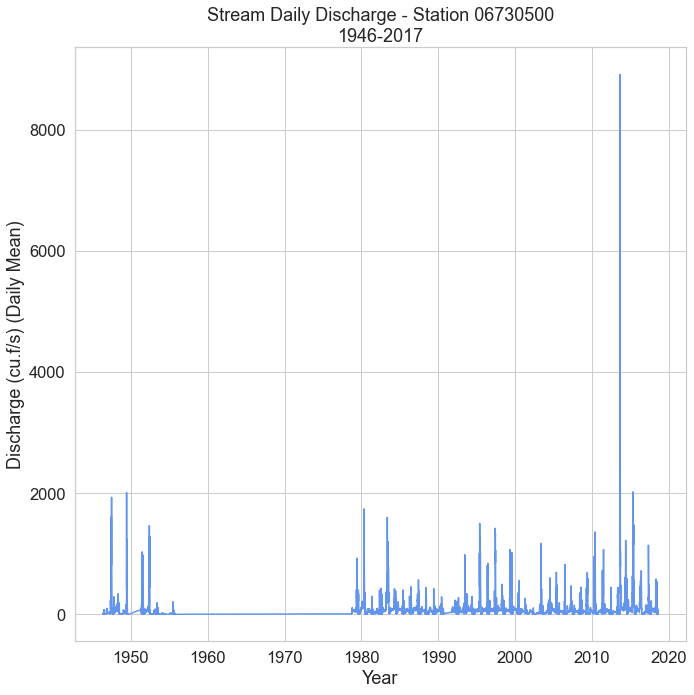

In [17]:
f, ax = plt.subplots(figsize=(10,10))

ax.plot(longmont_discharge.index.values,
        longmont_discharge['discharge'],
        color='cornflowerblue')
ax.set(xlabel='Year',
       ylabel='Discharge (cu.f/s) (Daily Mean)',
       title = 'Stream Daily Discharge - Station {}\n1946-2017'.format(site))
f.tight_layout()
plt.show()

#### Annual Maxima

In [18]:
longmont_discharge['year'] = longmont_discharge.index.year
longmont_discharge.head()

,discharge,flag,year
datetime,,,
1946-05-10,16.0,A,1946
1946-05-11,19.0,A,1946
1946-05-12,9.0,A,1946
1946-05-13,3.0,A,1946
1946-05-14,7.8,A,1946


Calculate annual max by resampling. 'AS' means year start. Synonymous with 'YS'.

In [19]:
longmont_discharge_annual_max = longmont_discharge.resample('AS').max()
longmont_discharge_annual_max.head()

,discharge,flag,year
datetime,,,
1946-01-01,99.0,A,1946.0
1947-01-01,1930.0,A,1947.0
1948-01-01,339.0,A,1948.0
1949-01-01,2010.0,A,1949.0
1950-01-01,NaN,NaN,NaN


Next download the yearly max data from USGS

In [20]:
url = 'https://nwis.waterdata.usgs.gov/nwis/peak?site_no=06730500&agency_cd=USGS&format=rdb'
download_path = os.path.join(os.path.expanduser('~'), 'earth-analytics', 'data', 'colorado-flood', 'downloads', 'annual-peak-flow.txt')
urllib.request.urlretrieve(url, download_path)

('C:\\Users\\Glen Shennan\\earth-analytics\\data\\colorado-flood\\downloads\\annual-peak-flow.txt',
 <http.client.HTTPMessage at 0x1bfa100c8e0>)

In [21]:
# Function to count the number of lines with a comment

def count_the(file_url):
    r = requests.get(file_url, stream=True)
    file = r.text
    count = 0
    for line in file:
        if line.startswith('#'):
            count += 1
    return count

lines_to_skip = count_the(url) + 1
lines_to_skip

73

In [22]:
usgs_annual_max = pd.read_csv(download_path,
                              skiprows = [lines_to_skip],
                              comment = '#',
                              sep = '\t',
                              usecols = ['peak_dt', 'peak_va'],
                              parse_dates = ['peak_dt'],
                              index_col = ['peak_dt'])

usgs_annual_max.head()

,peak_va
peak_dt,
1927-07-29,407.0
1928-06-04,694.0
1929-07-23,530.0
1930-08-18,353.0
1931-05-29,369.0


Are there any years that have more than one entry?

In [23]:
usgs_annual_max['year'] = usgs_annual_max.index.year
usgs_annual_max.head()

,peak_va,year
peak_dt,,
1927-07-29,407.0,1927
1928-06-04,694.0,1928
1929-07-23,530.0,1929
1930-08-18,353.0,1930
1931-05-29,369.0,1931


In [24]:
usgs_annual_max[usgs_annual_max.duplicated(subset='year') == True]

,peak_va,year
peak_dt,,
1947-10-15,721.0,1947
1993-10-18,497.0,1993


In [25]:
# Remove duplicate years - keep max discharge value
usgs_annual_max = usgs_annual_max.sort_values('peak_va', ascending=False).drop_duplicates('year').sort_index()

# If this returns no results then duplicates have been successfully removed
usgs_annual_max[usgs_annual_max.duplicated(subset='year') == True]

,peak_va,year
peak_dt,,


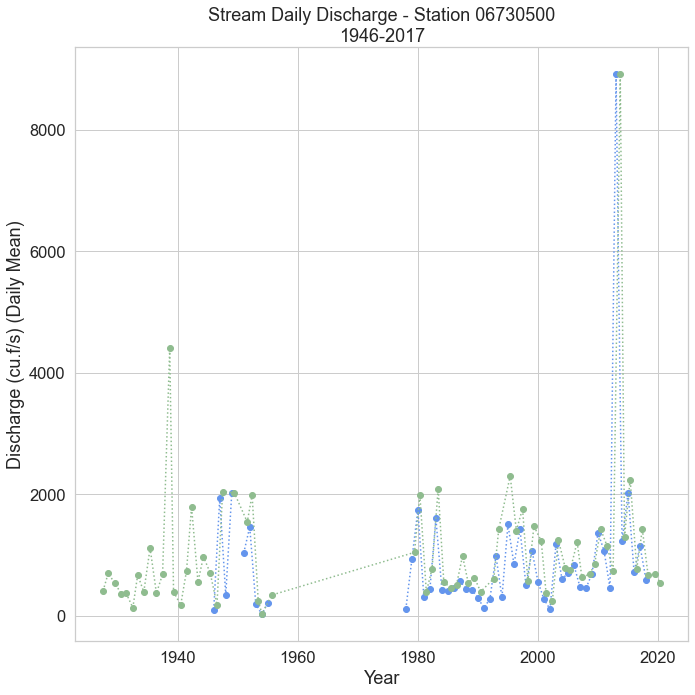

In [26]:
f, ax = plt.subplots(figsize=(10,10))

ax.plot(longmont_discharge_annual_max.index.values,
        longmont_discharge_annual_max['discharge'],
        color='cornflowerblue',
        label='Resampled data',
        linestyle=':',
        marker='o')

ax.set(xlabel='Year',
       ylabel='Discharge (cu.f/s) (Daily Mean)',
       title = 'Stream Daily Discharge - Station {}\n1946-2017'.format(site))

ax.plot(usgs_annual_max.index.values,
        usgs_annual_max['peak_va'],
        color='darkseagreen',
        label='USGS data',
        linestyle=':',
        marker='o')

f.tight_layout()
plt.show()

#### Optional - Difference Bar Plot

In [27]:
usgs_calculated = pd.merge(longmont_discharge_annual_max,
                           usgs_annual_max,
                           left_on='year',
                           right_on='year',)
usgs_calculated.head()

,discharge,flag,year,peak_va
0,99.0,A,1946.0,178.0
1,1930.0,A,1947.0,2040.0
2,2010.0,A,1949.0,2020.0
3,1030.0,A,1951.0,1540.0
4,1460.0,A,1952.0,1990.0


In [28]:
usgs_calculated['diff'] = usgs_calculated['peak_va'] - usgs_calculated['discharge']
usgs_calculated.head()

,discharge,flag,year,peak_va,diff
0,99.0,A,1946.0,178.0,79.0
1,1930.0,A,1947.0,2040.0,110.0
2,2010.0,A,1949.0,2020.0,10.0
3,1030.0,A,1951.0,1540.0,510.0
4,1460.0,A,1952.0,1990.0,530.0


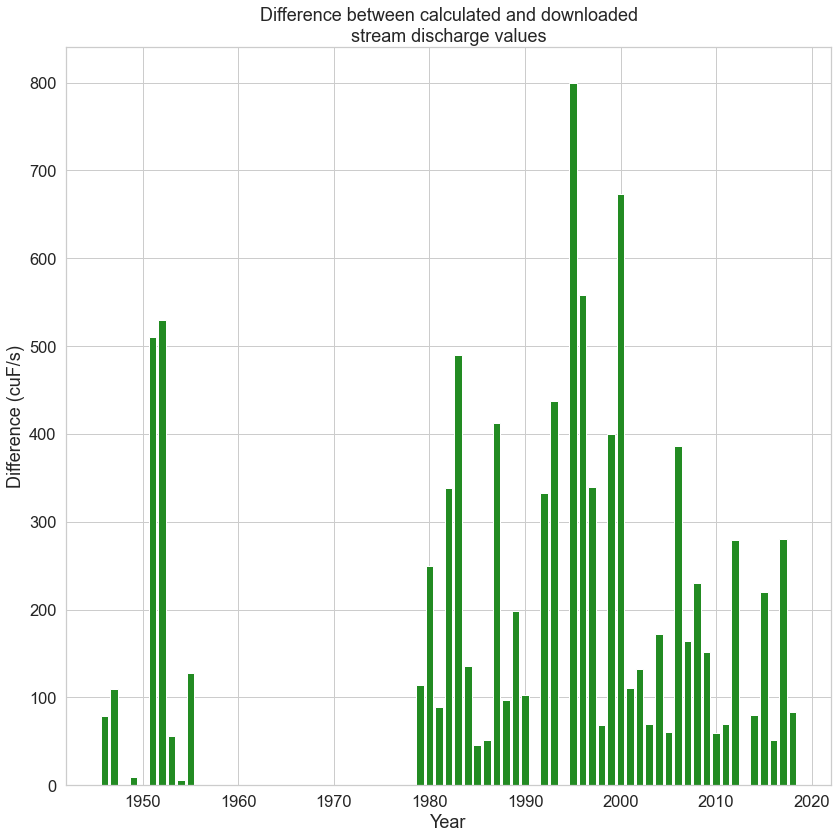

In [29]:
f, ax = plt.subplots(figsize=(12,12))

ax.bar(usgs_calculated['year'],
       usgs_calculated['diff'],
       color='forestgreen')
ax.set(xlabel='Year',
       ylabel='Difference (cuF/s)',
       title='Difference between calculated and downloaded\nstream discharge values')

f.tight_layout()
plt.show()

## Calculate Return Period

Sort data from smallest to largest

In [30]:
longmont_discharge_sorted = longmont_discharge.sort_values(by='discharge')

Count total observations

In [31]:
n = longmont_discharge_sorted.shape[0]

Add a number column 1 -> n to use for rank

In [32]:
longmont_discharge_sorted.insert(0, 'rank', range(1, 1+n))
longmont_discharge_sorted.head()

,rank,discharge,flag,year
datetime,,,,
1954-08-10,1,0.0,A,1954
1946-07-05,2,0.0,A,1946
1946-06-25,3,0.0,A,1946
1954-08-08,4,0.1,A,1954
1955-04-25,5,0.2,A,1955


Calculate probability. This may need to be adjusted based on the time period of the data.

In [33]:
longmont_discharge_sorted['probability'] = (
    (n - longmont_discharge_sorted['rank'] + 1) / (n + 1))
longmont_discharge_sorted['return-years'] = (
    1 / longmont_discharge_sorted['probability'])
longmont_discharge_sorted.head()

,rank,discharge,flag,year,probability,return-years
datetime,,,,,,
1954-08-10,1,0.0,A,1954,0.999941,1.000059
1946-07-05,2,0.0,A,1946,0.999883,1.000117
1946-06-25,3,0.0,A,1946,0.999824,1.000176
1954-08-08,4,0.1,A,1954,0.999766,1.000234
1955-04-25,5,0.2,A,1955,0.999707,1.000293


Turn the above into a function

In [34]:
def calculate_return(df, colname):
    """
    Calculate probability and return years for a df
    
    Accepts pandas DataFrame df with disharge values in colname.
    
    Returns df with columns 'probability' and 'return-years' added.
    """
    
    df_sorted = df.sort_values(colname)
    
    n = df_sorted.shape[0]
    
    df_sorted.insert(0, 'rank', range(1, 1+n))
    
    # Calculate probability
    df_sorted['probability'] = (n - df_sorted['rank'] + 1) / (n + 1)
    
    # Calculate return period (years)
    df_sorted['return-years'] = 1 / df_sorted['probability']
    
    return df_sorted

In [35]:
longmont_discharge.head()

,discharge,flag,year
datetime,,,
1946-05-10,16.0,A,1946
1946-05-11,19.0,A,1946
1946-05-12,9.0,A,1946
1946-05-13,3.0,A,1946
1946-05-14,7.8,A,1946


In [36]:
longmont_prob = calculate_return(longmont_discharge, 'discharge')

# Because the longmont_discharge data are daily convert return period to years
longmont_prob['return-years'] = longmont_prob['return-years'] / 365
longmont_prob['probability'] = longmont_prob['probability'] #* 365

longmont_prob.tail()

,rank,discharge,flag,year,probability,return-years
datetime,,,,,,
2013-09-16,17078,3270.0,A e,2013,0.000293,9.360548
2013-09-12,17079,3680.0,A,2013,0.000234,11.700685
2013-09-15,17080,3970.0,A e,2013,0.000176,15.600913
2013-09-14,17081,4970.0,A e,2013,0.000117,23.401370
2013-09-13,17082,8910.0,A e,2013,0.000059,46.802740


In [37]:
longmont_prob.describe()

,rank,discharge,year,probability,return-years
count,17082.000000,17082.000000,17082.00000,17082.000000,17082.000000
mean,8541.500000,82.254666,1990.40370,0.500000,0.028284
std,4931.292985,176.278063,20.75699,0.288667,0.458412
min,1.000000,0.000000,1946.00000,0.000059,0.002740
25%,4271.250000,14.000000,1982.00000,0.250029,0.003653
50%,8541.500000,47.000000,1995.00000,0.500000,0.005479
75%,12811.750000,77.775000,2006.00000,0.749971,0.010958
max,17082.000000,8910.000000,2018.00000,0.999941,46.802740


Calculate same thing using USGS annual max data

In [38]:
usgs_annual_prob = calculate_return(usgs_annual_max, 'peak_va')
usgs_annual_prob.head()

,rank,peak_va,year,probability,return-years
peak_dt,,,,,
1954-01-14,1,26.0,1954,0.985294,1.014925
1932-07-13,2,128.0,1932,0.970588,1.030303
1940-07-03,3,174.0,1940,0.955882,1.046154
1946-07-19,4,178.0,1946,0.941176,1.062500
2002-05-24,5,238.0,2002,0.926471,1.079365


In [39]:
usgs_annual_prob.describe()

,rank,peak_va,year,probability,return-years
count,67.000000,67.000000,67.000000,67.000000,67.000000
mean,34.000000,1066.253731,1975.895522,0.500000,4.860835
std,19.485037,1209.138277,31.360627,0.286545,9.498497
min,1.000000,26.000000,1927.000000,0.014706,1.014925
25%,17.500000,478.000000,1943.500000,0.257353,1.346667
50%,34.000000,702.000000,1985.000000,0.500000,2.000000
75%,50.500000,1350.000000,2003.500000,0.742647,3.888889
max,67.000000,8910.000000,2020.000000,0.985294,68.000000


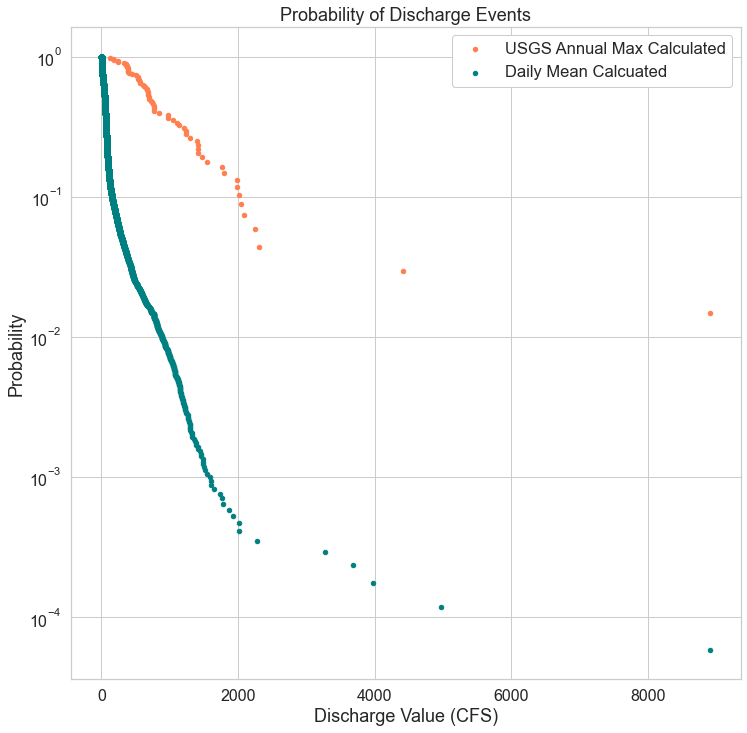

In [40]:
f, ax = plt.subplots(figsize = (12,12))

usgs_annual_prob.plot.scatter(x='peak_va',
                              y='probability',
                              title='Probabiliy',
                              ax=ax,
                              color='coral',
                              fontsize=16,
                              logy=True,
                              label='USGS Annual Max Calculated')
longmont_prob.plot.scatter(x='discharge',
                           y='probability',
                           title='Probability',
                           ax=ax,
                           color='teal',
                           fontsize=16,
                           logy=True,
                           label='Daily Mean Calcuated')

ax.legend(frameon=True, framealpha=1)

ax.set_ylabel('Probability')
ax.set_xlabel('Discharge Value (CFS)')
ax.set_title('Probability of Discharge Events')

plt.show()

#### Plot Stream Discharge Return Period

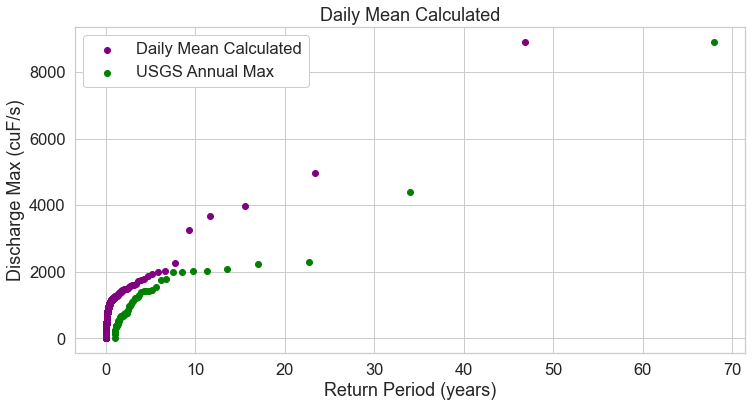

In [50]:
f, ax = plt.subplots(figsize=(12,6))

ax.scatter(longmont_prob['return-years'],
           longmont_prob['discharge'],
           color='purple',
           label='Daily Mean Calculated')
ax.scatter(usgs_annual_prob['return-years'],
           usgs_annual_prob['peak_va'],
           color='green',
           label='USGS Annual Max')
ax.set(xlabel='Return Period (years)',
       ylabel='Discharge Max (cuF/s)',
       title='Daily Mean Calculated')
ax.legend(frameon=True, framealpha=1)
plt.show()